**In this project, my aim is to build a time series forecasting machine learning model to predict food prices in Finland. The datasets for this project include monthly prices for different food items, electricity prices, and consumer price index. All data was obtained from Tilastokeskus, which is a Finnish government agency that provides statistical information and research data.**

**The notebook had two main goals. First, to clean and modify the data into a suitable format for analysis. Second, to perform a preliminary analysis of the data. The analysis revealed that there is a decent correlation between our independent variables (electricity prices, and consumer price index) and dependent variable (food prices). However, it was found that certain food items (apples and bananas) were not suitable for the model because Finnish electricity prices do not affect their prices.**

**During the analysis, several outliers were identified in the data. These outliers were extreme values, but they were actually valuable data because food prices have rapidly increased in Finland in recent years. Identifying and analyzing these outliers could provide insight into future price trends.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("ruoka.csv")
df


,"11xf -- Kuluttajahintaindeksi (2005=100), kuukausitiedot, 2005M01-2023M02",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Kuukausi,Hyodyke,Pisteluku
2,2005M01,0111 Viljatuotteet ja leipa,99.51
3,2005M01,0112 Liha,99.88
4,2005M01,01141 Maito,100.21
...,...,...,...
1523,2023M02,01141 Maito,165.83
1524,2023M02,01144 Juustot ja rahkat,155.2
1525,2023M02,01151 Voi,143.93
1526,2023M02,011612 Banaanit,.


In [2]:

#Reading files with usable encoding

df1 = pd.read_csv("KHI.csv", encoding="ISO-8859-1", header=1)
df2 = pd.read_csv("ruoka.csv", encoding="ISO-8859-1", header=2)
df3 = pd.read_csv("sahko.csv", encoding="ISO-8859-1", header=2)

#Combining datasets

df_combined = pd.merge(df1, df2, on='Kuukausi')
df_combined = pd.merge(df_combined, df3, on='Kuukausi')

df_combined["Hyodyke_Pisteluku"] = df_combined['Hyodyke'].astype(str) + df_combined["Pisteluku"].astype(str)
df_combined = df_combined.drop(["Sahkon kuluttajatyyppi", "Hyodyke"], axis=1, errors='ignore')

df_combined


,Kuukausi,Vuosimuutos (%),Pisteluku,Hinta (snt/kWh),Hyodyke_Pisteluku
0,2008M01,3.8,108.88,5.41,0111 Viljatuotteet ja leipa108.88
1,2008M01,3.8,108.11,5.41,0112 Liha108.11
2,2008M01,3.8,118.21,5.41,01141 Maito118.21
3,2008M01,3.8,107.76,5.41,01144 Juustot ja rahkat107.76
4,2008M01,3.8,109.78,5.41,01151 Voi109.78
...,...,...,...,...,...
1262,2023M01,8.4,162.76,12.33,01141 Maito162.76
1263,2023M01,8.4,150.39,12.33,01144 Juustot ja rahkat150.39
1264,2023M01,8.4,141.68,12.33,01151 Voi141.68
1265,2023M01,8.4,.,12.33,011612 Banaanit.


In [3]:
#Modifying and exploring data

df_combined['Pisteluku'] = pd.to_numeric(df_combined['Pisteluku'], errors='coerce')
df_combined['Pisteluku_pct_change'] = df_combined['Pisteluku'].pct_change() * 100
df_combined = df_combined.dropna(subset=['Pisteluku_pct_change'])
df_combined['Pisteluku_pct_change'].fillna(0, inplace=True)
df_combined['Kuukausi'] = pd.to_datetime(df_combined['Kuukausi'], format='%YM%m')
df_combined['Year'] = df_combined['Kuukausi'].dt.year
df_combined['Month'] = df_combined['Kuukausi'].dt.month
df_combined.head()
df_combined.info()
df_combined.describe()

df_combined

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/tmp/ipykernel_9413/1942507351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Kuukausi'] = pd.to_datetime(df_combined['Kuukausi'], format='%YM%m')
/tmp/ipykernel_9413/1942507351.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,Kuukausi,Vuosimuutos (%),Pisteluku,Hinta (snt/kWh),Hyodyke_Pisteluku,Pisteluku_pct_change,Year,Month
1,2008-01-01,3.8,108.11,5.41,0112 Liha108.11,-0.707201,2008,1
2,2008-01-01,3.8,118.21,5.41,01141 Maito118.21,9.342337,2008,1
3,2008-01-01,3.8,107.76,5.41,01144 Juustot ja rahkat107.76,-8.840200,2008,1
4,2008-01-01,3.8,109.78,5.41,01151 Voi109.78,1.874536,2008,1
5,2008-01-01,3.8,86.42,5.41,011612 Banaanit86.42,-21.278921,2008,1
...,...,...,...,...,...,...,...,...
1262,2023-01-01,8.4,162.76,12.33,01141 Maito162.76,1.756799,2023,1
1263,2023-01-01,8.4,150.39,12.33,01144 Juustot ja rahkat150.39,-7.600147,2023,1
1264,2023-01-01,8.4,141.68,12.33,01151 Voi141.68,-5.791608,2023,1
1265,2023-01-01,8.4,NaN,12.33,011612 Banaanit.,0.000000,2023,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 1 to 1266
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kuukausi              1266 non-null   datetime64[ns]
 1   Vuosimuutos (%)       1266 non-null   float64       
 2   Pisteluku             1096 non-null   float64       
 3   Hinta (snt/kWh)       1266 non-null   float64       
 4   Hyodyke_Pisteluku     1266 non-null   object        
 5   Pisteluku_pct_change  1266 non-null   float64       
 6   Year                  1266 non-null   int64         
 7   Month                 1266 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 89.0+ KB


In [4]:
#Some cleaning

duplicates = df_combined[df_combined.duplicated(keep=False)]
print(duplicates)
df_combined['Hyodyke_Pisteluku'] = df_combined['Hyodyke_Pisteluku'].str.replace(r'[^a-zA-Z]', '')
df_combined




/tmp/ipykernel_9413/86142770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Hyodyke_Pisteluku'] = df_combined['Hyodyke_Pisteluku'].str.replace(r'[^a-zA-Z]', '')


,Kuukausi,Vuosimuutos (%),Pisteluku,Hinta (snt/kWh),Hyodyke_Pisteluku,Pisteluku_pct_change,Year,Month
1,2008-01-01,3.8,108.11,5.41,Liha,-0.707201,2008,1
2,2008-01-01,3.8,118.21,5.41,Maito,9.342337,2008,1
3,2008-01-01,3.8,107.76,5.41,Juustotjarahkat,-8.840200,2008,1
4,2008-01-01,3.8,109.78,5.41,Voi,1.874536,2008,1
5,2008-01-01,3.8,86.42,5.41,Banaanit,-21.278921,2008,1
...,...,...,...,...,...,...,...,...
1262,2023-01-01,8.4,162.76,12.33,Maito,1.756799,2023,1
1263,2023-01-01,8.4,150.39,12.33,Juustotjarahkat,-7.600147,2023,1
1264,2023-01-01,8.4,141.68,12.33,Voi,-5.791608,2023,1
1265,2023-01-01,8.4,NaN,12.33,Banaanit,0.000000,2023,1


Empty DataFrame
Columns: [Kuukausi, Vuosimuutos (%), Pisteluku, Hinta (snt/kWh), Hyodyke_Pisteluku, Pisteluku_pct_change, Year, Month]
Index: []


In [5]:
# Pivot combined data, set multi-level index

wide_data = df_combined.pivot_table(index=['Kuukausi', 'Vuosimuutos (%)', 'Hinta (snt/kWh)', 'Year', 'Month'],
                             columns='Hyodyke_Pisteluku',
                             values='Pisteluku').reset_index()


wide_data

Hyodyke_Pisteluku,Kuukausi,Vuosimuutos (%),Hinta (snt/kWh),Year,Month,Banaanit,Juustotjarahkat,Liha,Maito,Omenat,Viljatuotteetjaleipa,Voi
0,2008-01-01,3.8,5.41,2008,1,86.42,107.76,108.11,118.21,114.62,NaN,109.78
1,2008-02-01,3.7,4.96,2008,2,93.85,109.07,108.96,119.00,112.32,109.91,111.25
2,2008-03-01,3.9,5.18,2008,3,103.90,108.76,109.68,119.32,117.19,109.92,111.19
3,2008-04-01,3.5,5.14,2008,4,107.51,108.78,109.69,119.51,121.59,110.51,111.16
4,2008-05-01,4.2,5.21,2008,5,100.90,115.74,110.10,130.31,129.34,111.44,118.91
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-09-01,8.1,14.53,2022,9,NaN,149.66,161.47,154.83,NaN,145.36,134.71
177,2022-10-01,8.3,10.39,2022,10,NaN,149.71,162.62,159.38,NaN,146.23,133.55
178,2022-11-01,9.1,11.21,2022,11,NaN,150.91,161.64,161.78,NaN,145.94,139.70
179,2022-12-01,9.1,15.46,2022,12,NaN,149.75,159.91,161.76,NaN,146.19,138.51


In [6]:
#Filling nan:s with other ingredient mean (not good approach)

mean = wide_data["Voi"].mean()
wide_data['Banaanit'].fillna(mean, inplace=True)
wide_data['Omenat'].fillna(mean, inplace=True)
wide_data['Viljatuotteetjaleipa'].fillna(mean, inplace=True)


wide_data.columns.name = 'index'

wide_data

index,Kuukausi,Vuosimuutos (%),Hinta (snt/kWh),Year,Month,Banaanit,Juustotjarahkat,Liha,Maito,Omenat,Viljatuotteetjaleipa,Voi
0,2008-01-01,3.8,5.41,2008,1,86.420000,107.76,108.11,118.21,114.620000,105.249116,109.78
1,2008-02-01,3.7,4.96,2008,2,93.850000,109.07,108.96,119.00,112.320000,109.910000,111.25
2,2008-03-01,3.9,5.18,2008,3,103.900000,108.76,109.68,119.32,117.190000,109.920000,111.19
3,2008-04-01,3.5,5.14,2008,4,107.510000,108.78,109.69,119.51,121.590000,110.510000,111.16
4,2008-05-01,4.2,5.21,2008,5,100.900000,115.74,110.10,130.31,129.340000,111.440000,118.91
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-09-01,8.1,14.53,2022,9,105.249116,149.66,161.47,154.83,105.249116,145.360000,134.71
177,2022-10-01,8.3,10.39,2022,10,105.249116,149.71,162.62,159.38,105.249116,146.230000,133.55
178,2022-11-01,9.1,11.21,2022,11,105.249116,150.91,161.64,161.78,105.249116,145.940000,139.70
179,2022-12-01,9.1,15.46,2022,12,105.249116,149.75,159.91,161.76,105.249116,146.190000,138.51


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Testing some normalization ways

columns_to_normalize = ['Vuosimuutos (%)', 'Hinta (snt/kWh)', 'Year', 'Month', 
    'Banaanit', 'Juustotjarahkat', 'Liha', 'Maito', 'Omenat', 
    'Viljatuotteetjaleipa', 'Voi'
]

# Create a copy of the data to avoid modifying the original DataFrame
data_normalized = wide_data.copy()

# Min-Max normalization
min_max_scaler = MinMaxScaler()
data_normalized[columns_to_normalize] = min_max_scaler.fit_transform(wide_data[columns_to_normalize])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
data_standardized = wide_data.copy()
data_standardized[columns_to_normalize] = standard_scaler.fit_transform(wide_data[columns_to_normalize])

data_standardized


index,Kuukausi,Vuosimuutos (%),Hinta (snt/kWh),Year,Month,Banaanit,Juustotjarahkat,Liha,Maito,Omenat,Viljatuotteetjaleipa,Voi
0,2008-01-01,0.983807,-0.393362,-1.619670,-1.577822,-1.124179,-1.939197,-1.607747,-1.458064,-0.074489,-2.308680,0.323530
1,2008-02-01,0.934261,-0.666946,-1.619670,-1.289351,-0.331523,-1.754043,-1.527992,-1.385084,-0.236206,-1.619883,0.428496
2,2008-03-01,1.033353,-0.533194,-1.619670,-1.000881,0.740644,-1.797858,-1.460435,-1.355523,0.106211,-1.618405,0.424212
3,2008-04-01,0.835169,-0.557512,-1.619670,-0.712411,1.125771,-1.795031,-1.459497,-1.337971,0.415582,-1.531214,0.422070
4,2008-05-01,1.181992,-0.514955,-1.619670,-0.423940,0.420594,-0.811310,-1.421027,-0.340273,0.960498,-1.393776,0.975463
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-09-01,3.114295,5.151261,1.599344,0.729942,0.884572,3.982915,3.398968,1.924871,-0.733371,3.619006,2.103670
177,2022-10-01,3.213387,2.634294,1.599344,1.018412,0.884572,3.989982,3.506871,2.345198,-0.733371,3.747577,2.020840
178,2022-11-01,3.609757,3.132823,1.599344,1.306883,0.884572,4.159589,3.414919,2.566909,-0.733371,3.704720,2.459984
179,2022-12-01,3.609757,5.716666,1.599344,1.595353,0.884572,3.995636,3.252595,2.565061,-0.733371,3.741666,2.375011


In [8]:
# More cleaning

wide_data['Date'] = pd.to_datetime(wide_data[['Year', 'Month']].assign(day=1))
wide_data = wide_data.set_index('Date')

wide_data = wide_data.drop(['Year', 'Month'], axis=1)

wide_data

index,Kuukausi,Vuosimuutos (%),Hinta (snt/kWh),Banaanit,Juustotjarahkat,Liha,Maito,Omenat,Viljatuotteetjaleipa,Voi
Date,,,,,,,,,,
2008-01-01,2008-01-01,3.8,5.41,86.420000,107.76,108.11,118.21,114.620000,105.249116,109.78
2008-02-01,2008-02-01,3.7,4.96,93.850000,109.07,108.96,119.00,112.320000,109.910000,111.25
2008-03-01,2008-03-01,3.9,5.18,103.900000,108.76,109.68,119.32,117.190000,109.920000,111.19
2008-04-01,2008-04-01,3.5,5.14,107.510000,108.78,109.69,119.51,121.590000,110.510000,111.16
2008-05-01,2008-05-01,4.2,5.21,100.900000,115.74,110.10,130.31,129.340000,111.440000,118.91
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,2022-09-01,8.1,14.53,105.249116,149.66,161.47,154.83,105.249116,145.360000,134.71
2022-10-01,2022-10-01,8.3,10.39,105.249116,149.71,162.62,159.38,105.249116,146.230000,133.55
2022-11-01,2022-11-01,9.1,11.21,105.249116,150.91,161.64,161.78,105.249116,145.940000,139.70


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

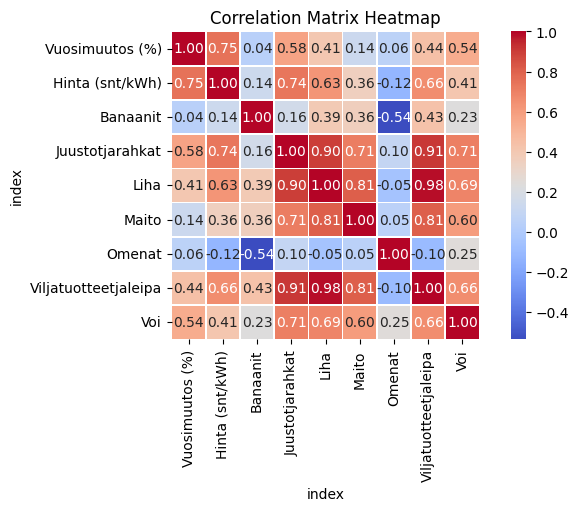

In [9]:

correlation_matrix = wide_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")

In [10]:

wide_data = wide_data.drop(["Kuukausi", "Banaanit", "Omenat"], axis=1)
print(wide_data.columns)

Index(['Vuosimuutos (%)', 'Hinta (snt/kWh)', 'Juustotjarahkat', 'Liha',
       'Maito', 'Viljatuotteetjaleipa', 'Voi'],
      dtype='object', name='index')


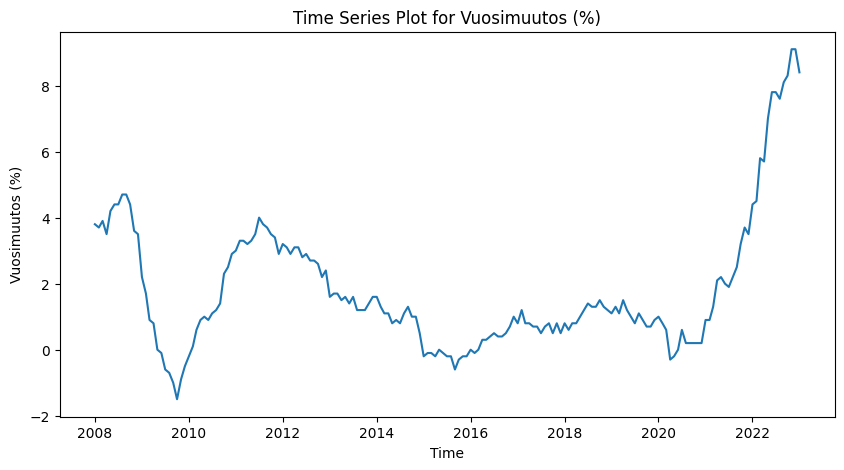

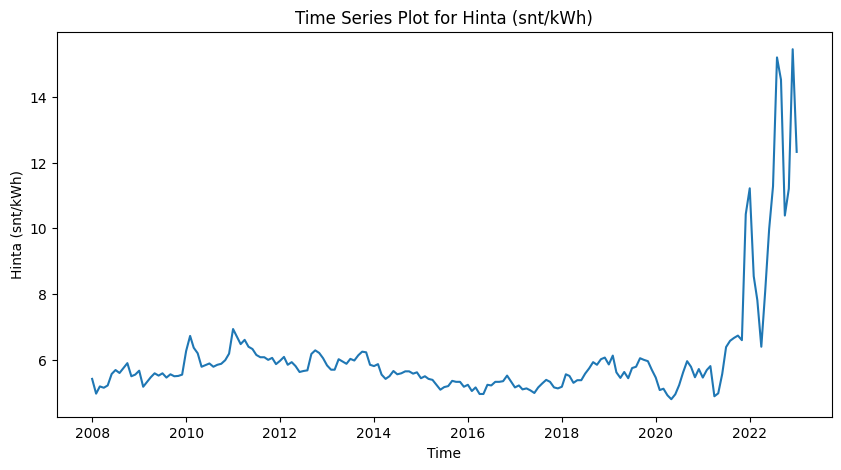

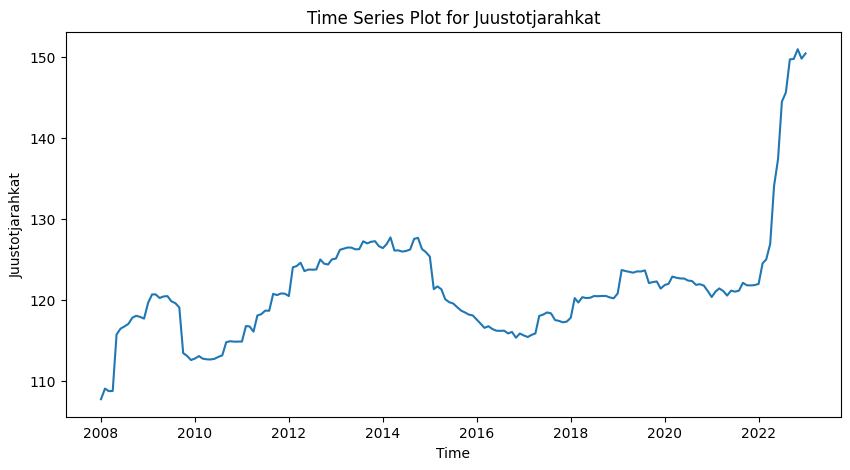

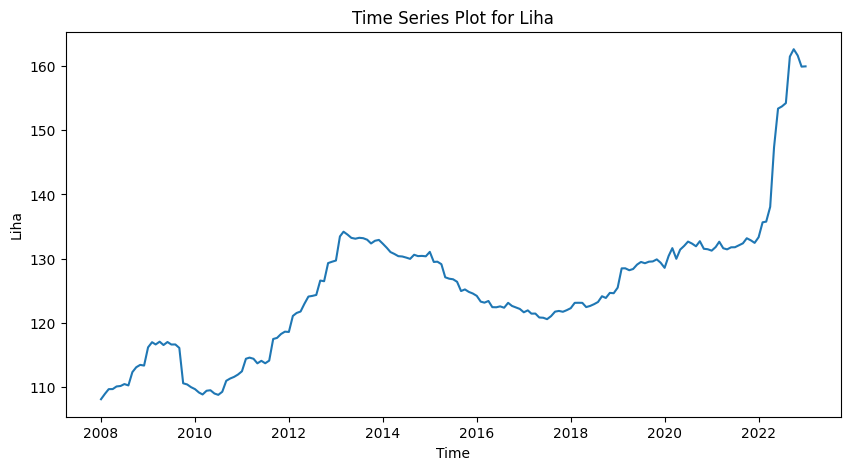

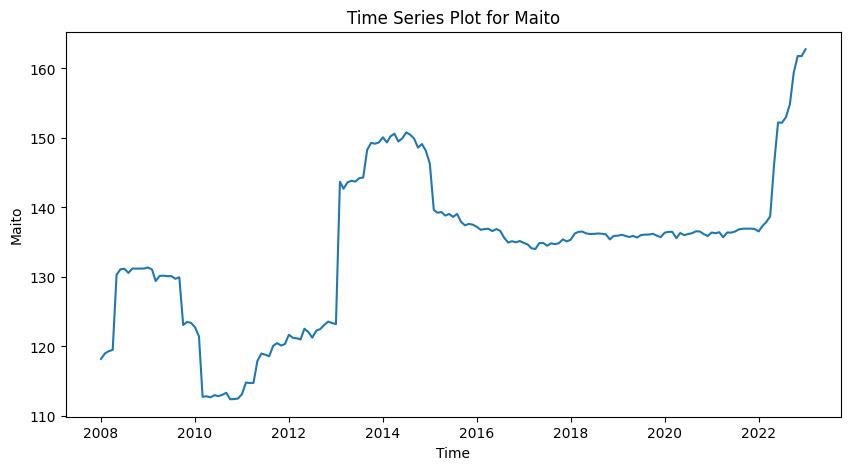

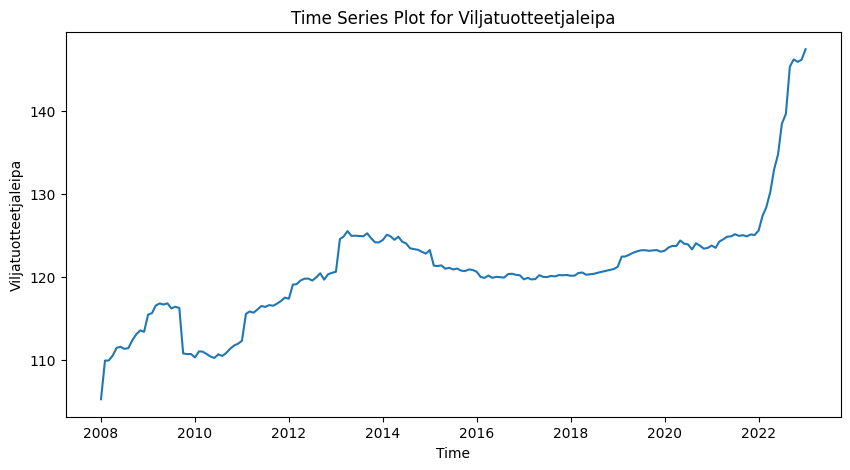

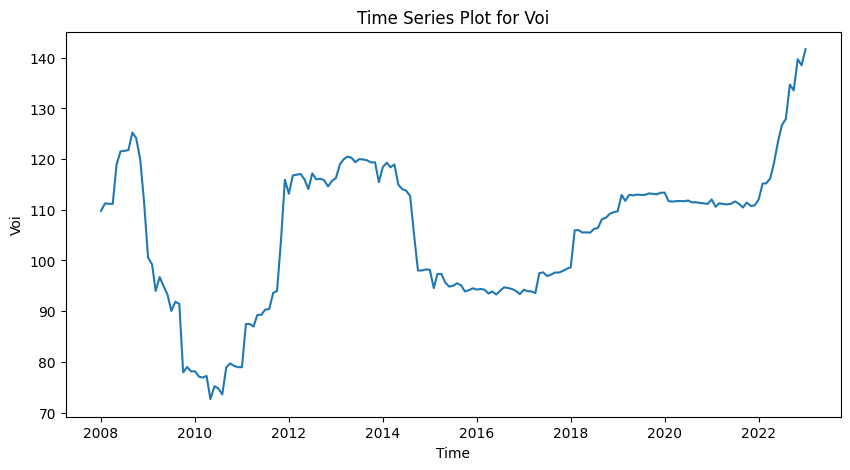

In [11]:
# Plot time series for columns

for column in wide_data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(wide_data[column])
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(f'Time Series Plot for {column}')
    plt.show()

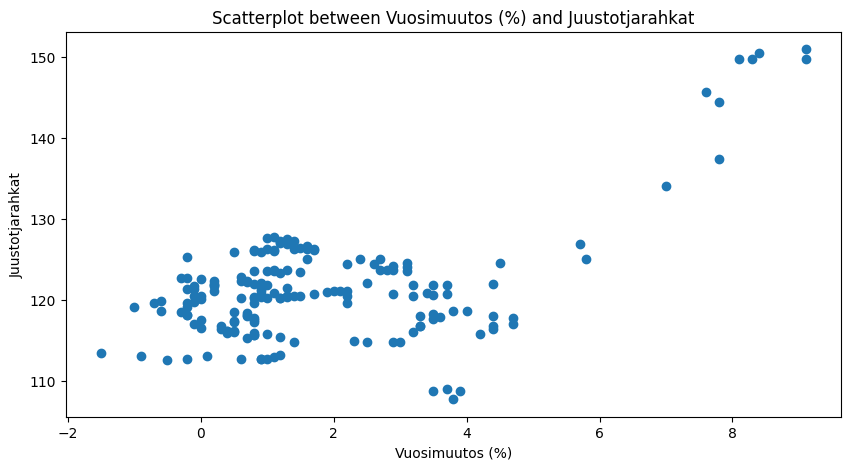

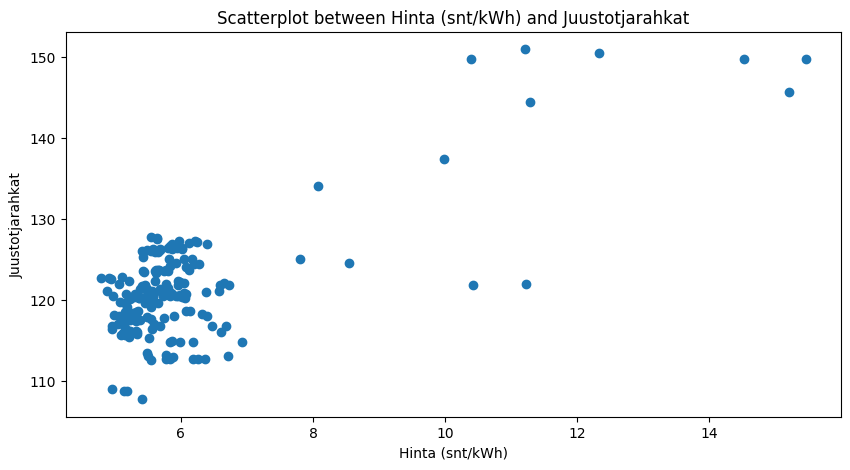

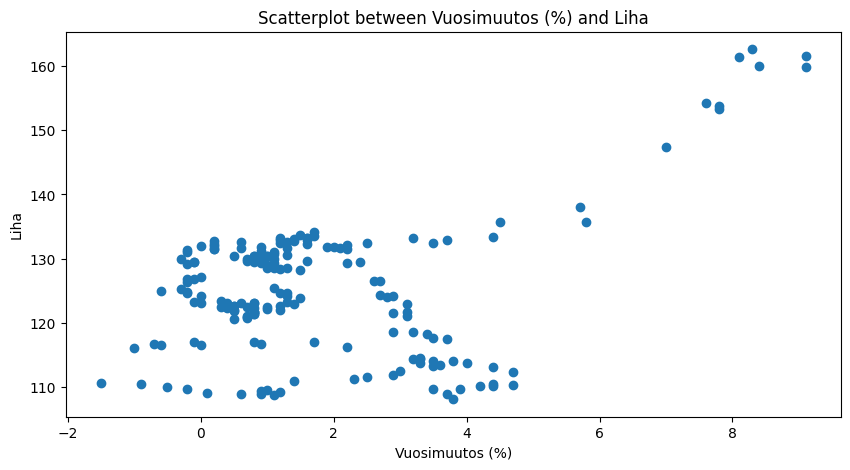

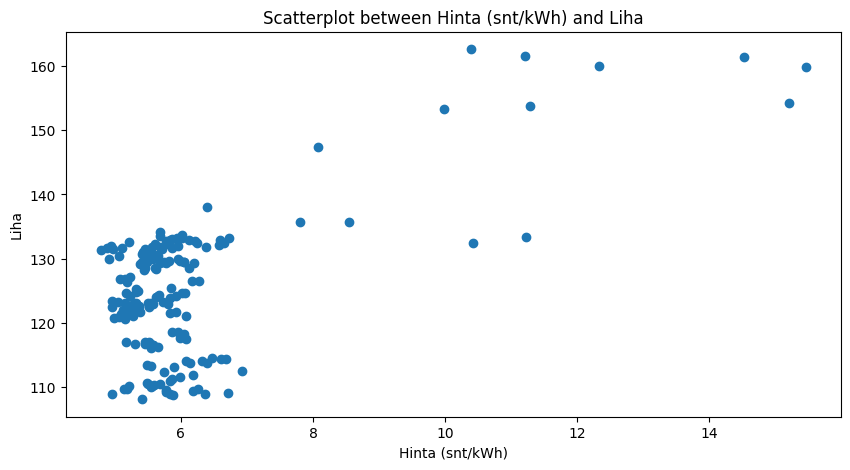

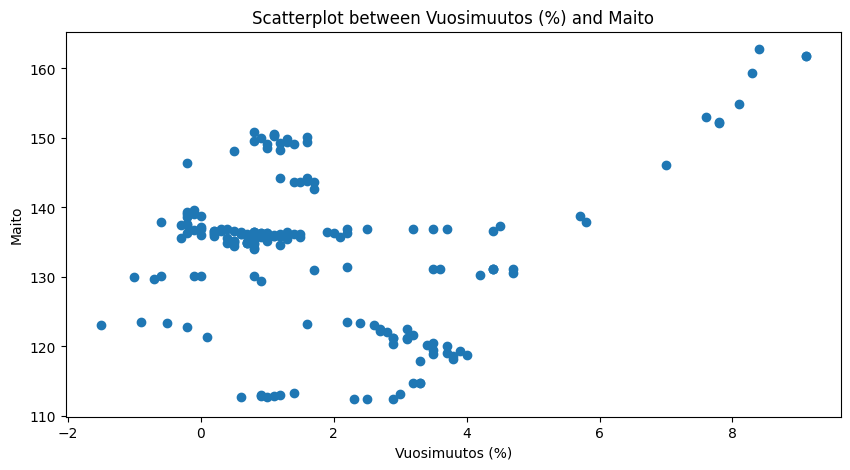

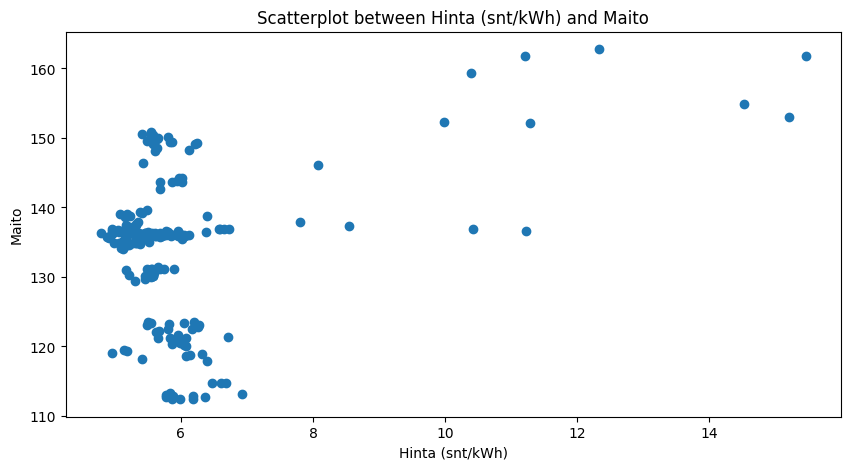

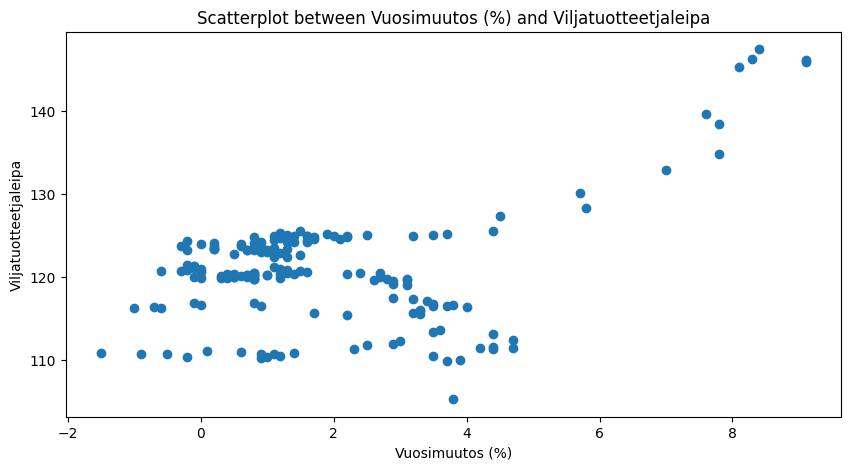

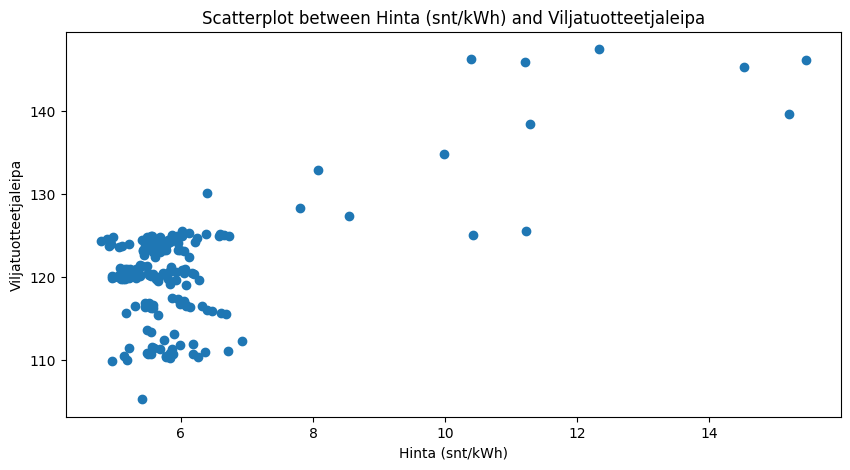

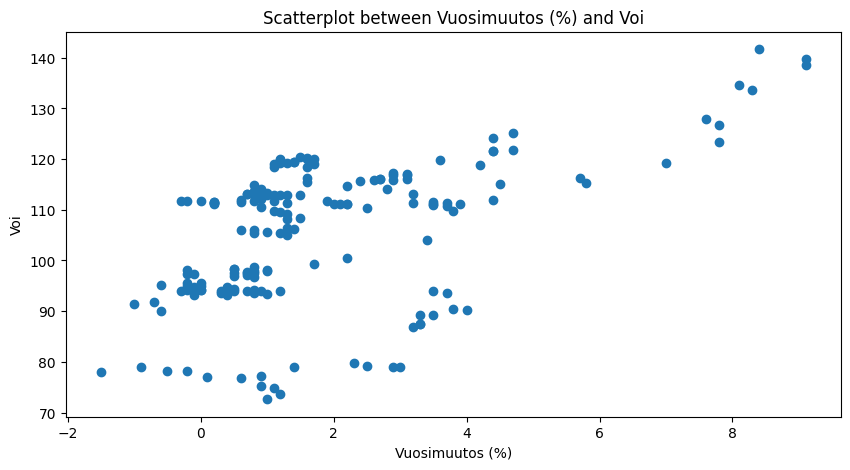

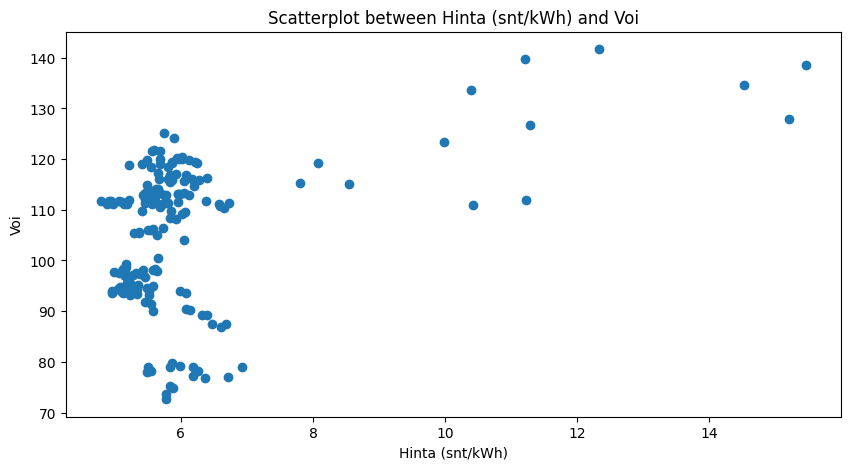

In [12]:
# Generate scatterplots for variable pairs


data = wide_data
target_variables = ["Juustotjarahkat", "Liha", "Maito", "Viljatuotteetjaleipa", "Voi"]
independent_variables = list(data.columns.drop(target_variables))

for target_variable in target_variables:
    for column in independent_variables:
        plt.figure(figsize=(10, 5))
        plt.scatter(data[column], data[target_variable])
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatterplot between {column} and {target_variable}')
        plt.show()

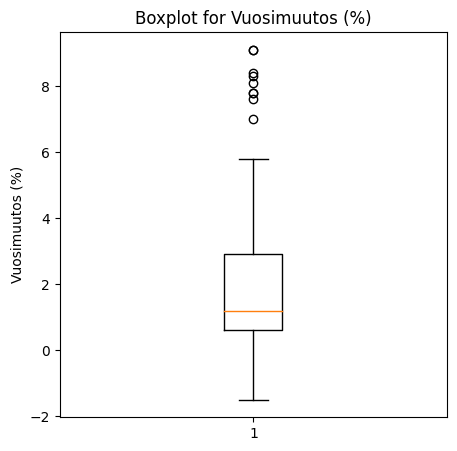

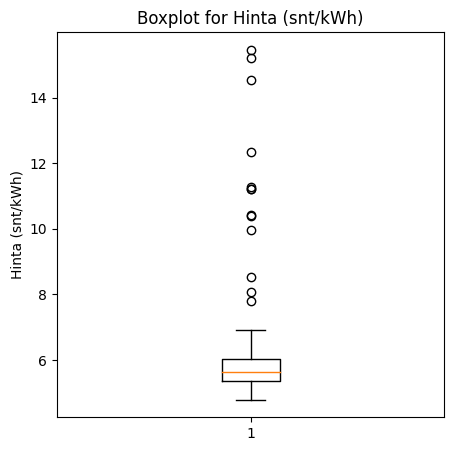

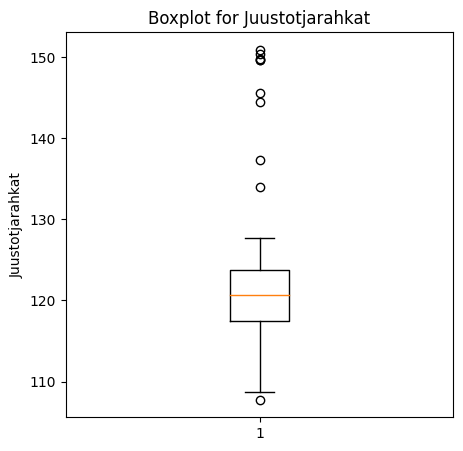

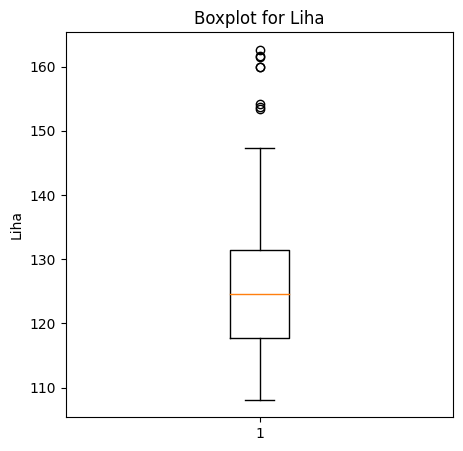

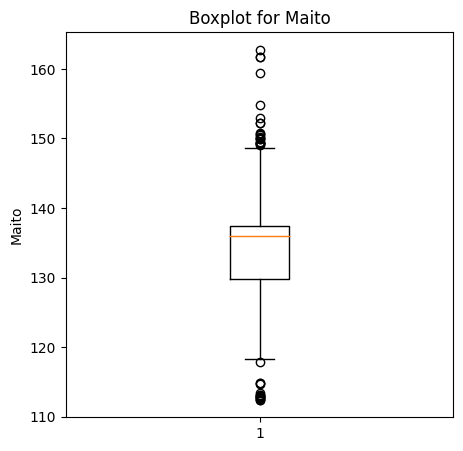

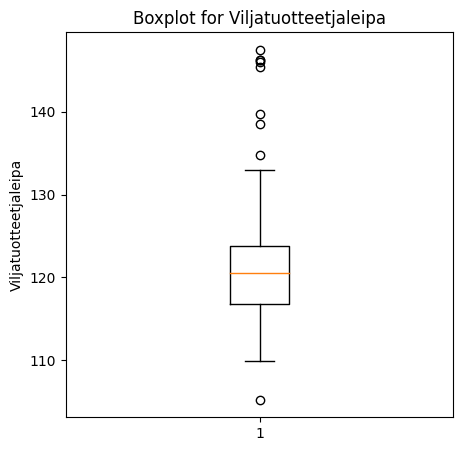

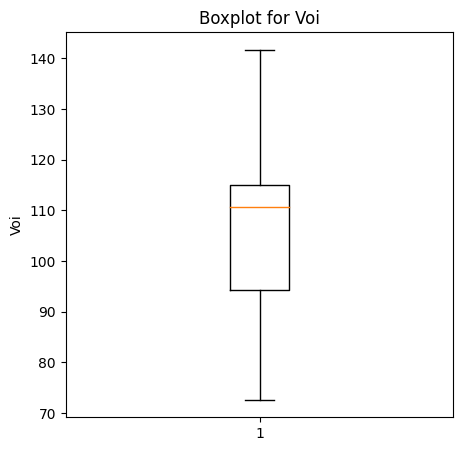

In [13]:
# Create boxplots for each column

for column in data.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(data[column])
    plt.ylabel(column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [21]:
data.to_csv('cleaned.csv', index=True)

****